In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import sklearn as sk
import statsmodels as st
import seaborn as sns

In [97]:
df = pd.read_csv('AirPassengers.csv')

df.columns = ['Date', 'Passengers']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

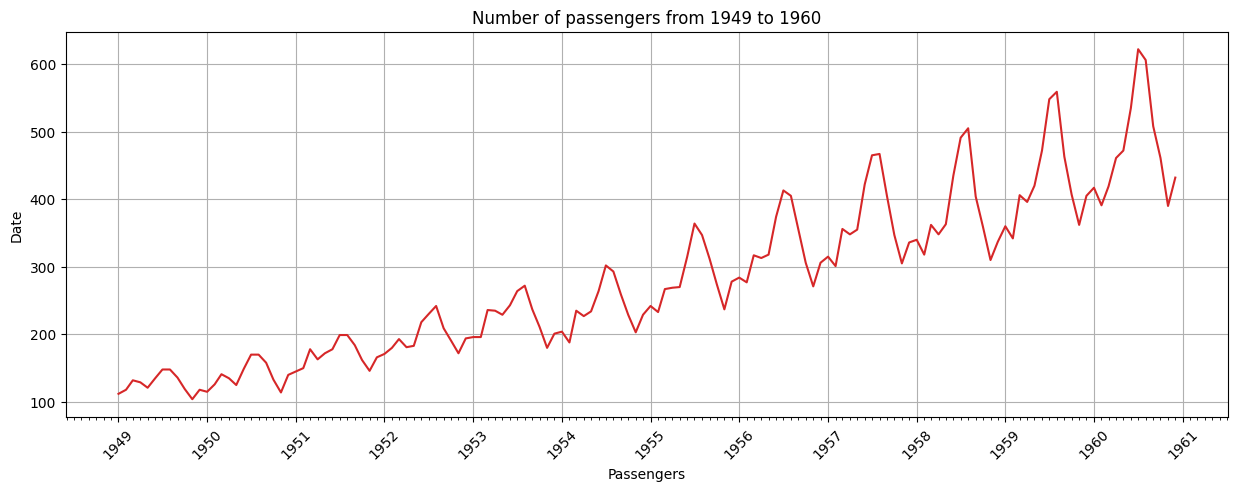

In [70]:
def plot_df(DF, X, Y, title='', xlabel='', ylabel='', dpi=100):
    
    plt.figure(figsize=(15, 5), dpi=dpi)
    plt.plot(X, Y, color='tab:red')
    
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Дополнительная разметка по месяцам
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    plt.xticks(rotation=45)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(True)
    plt.show()
    
plot_df(df, df['Date'], df['Passengers'], title='Number of passengers from 1949 to 1960', ylabel='Date', xlabel='Passengers')

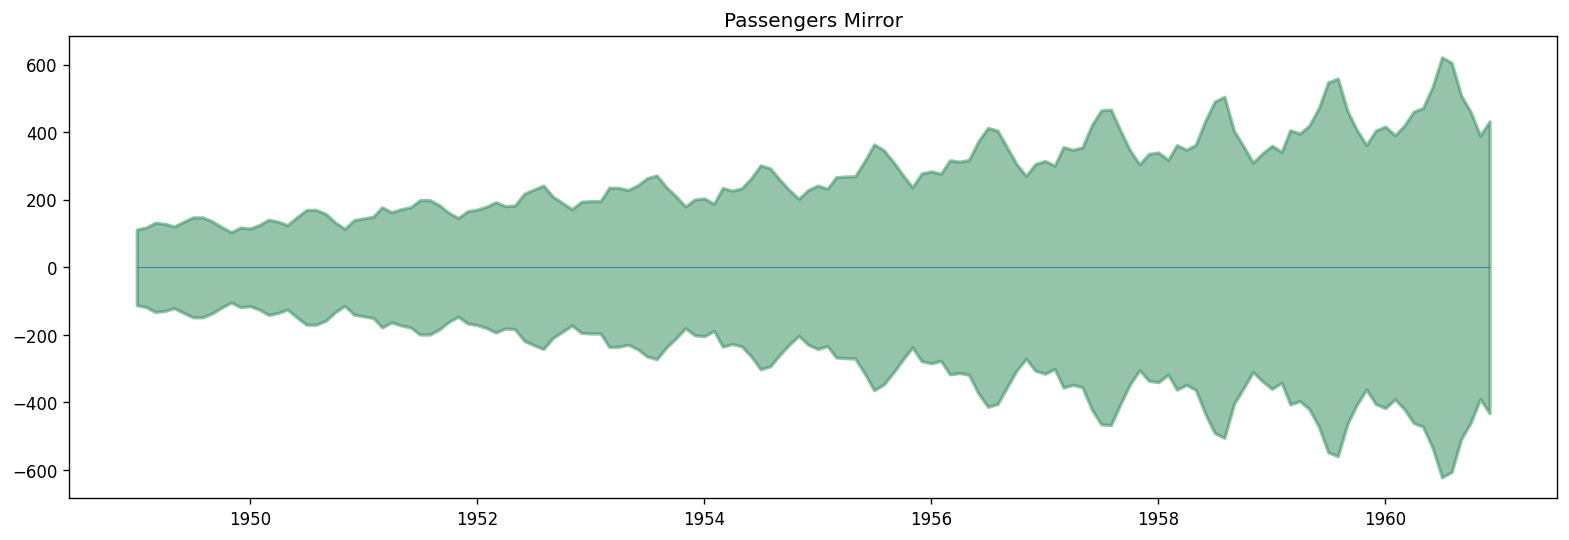

In [73]:
x = df['Date']
y = df['Passengers']

fig, ax = plt.subplots(1, 1, figsize=(16, 5), dpi=120)
plt.fill_between(x, y1=y, y2=-y, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim=(-800, 800)
plt.title('Passengers Mirror')
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from dateutil.parser import parse


stat = adfuller(df['Date'])

print(f'ADF - static: {stat[0]:.3f}')
print(f'p-value     : {stat[1]:.3f}')

if stat[1] < 0.05:
    print('Not stationary')
else:
    print('Stationary')
    

for key, value in stat[4].items():
    print(f'critical value: {key} | {value}')

ADF - static: 0.419
p-value     : 0.982
Stationary
critical value: 1% | -3.481281802271349
critical value: 5% | -2.883867891664528
critical value: 10% | -2.5786771965503177


-----------------

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as stat
import scipy as sc
import sklearn as sk

In [121]:
df = pd.read_csv('AirPassengers.csv')
df.columns = ['Date', 'Passengers']

In [122]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [95]:
df.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


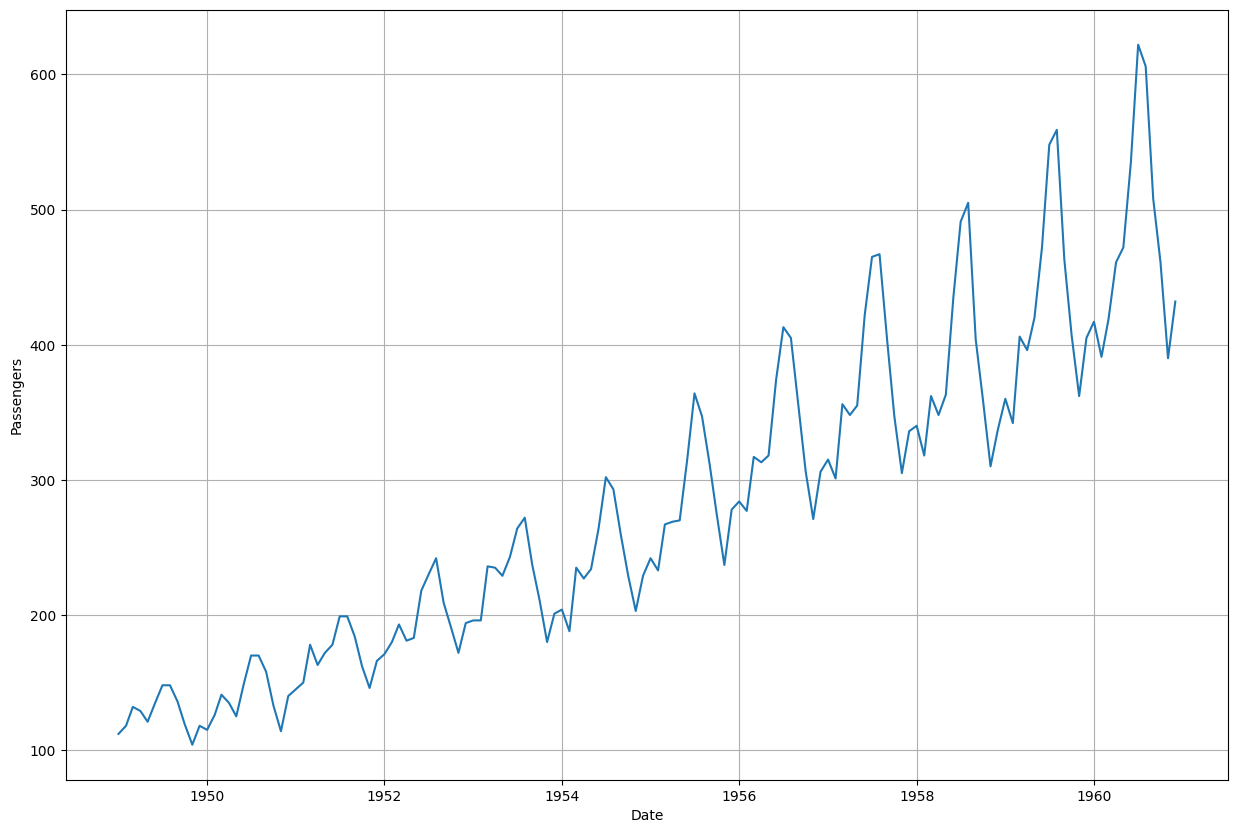

In [96]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df['Date'], y=df['Passengers'])
plt.grid(True)
plt.ylabel('Passengers')
plt.show()

In [97]:
df.index = df['Date']

In [98]:
del df['Date']

In [99]:
roll_mean = df.rolling(7).mean()
roll_std = df.rolling(7).std()

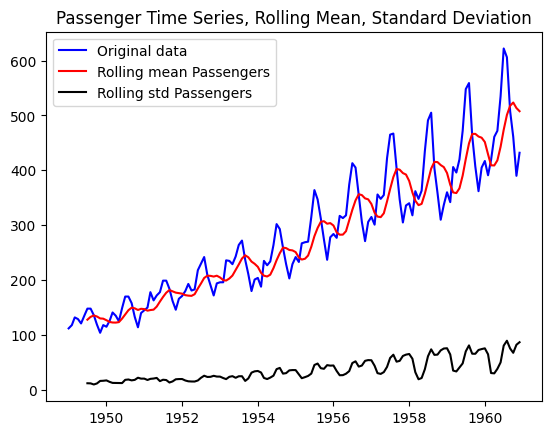

In [100]:
plt.plot(df, c='blue', label='Original data')
plt.plot(roll_mean, c='red', label='Rolling mean Passengers')
plt.plot(roll_std, c='black', label='Rolling std Passengers')
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc='best')
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(df, autolag='AIC')

print(f'T-statistic: {res[0]:.3f} | p_value: {res[1]:.3f}', "\n")

if res[1] < 0.05:
    print('Stationary', '\n')
else:
    print('Not Stationary', '\n')

for percent, cr_level in res[4].items():
    print(f'perecrnt: {percent} | critical_level: {cr_level}')

T-statistic: 0.815 | p_value: 0.992 

Not Stationary 

perecrnt: 1% | critical_level: -3.4816817173418295
perecrnt: 5% | critical_level: -2.8840418343195267
perecrnt: 10% | critical_level: -2.578770059171598


In [102]:
auto_corr = df['Passengers'].autocorr(lag=1)
print(f'1 Month: {auto_corr}')

1 Month: 0.9601946480498522


In [103]:
autocorrelation_lag3 = df['Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167602


In [104]:
print(df['Passengers'].autocorr())

0.9601946480498522


In [105]:
date = pd.date_range('1949-01-01', '1960-12-01')

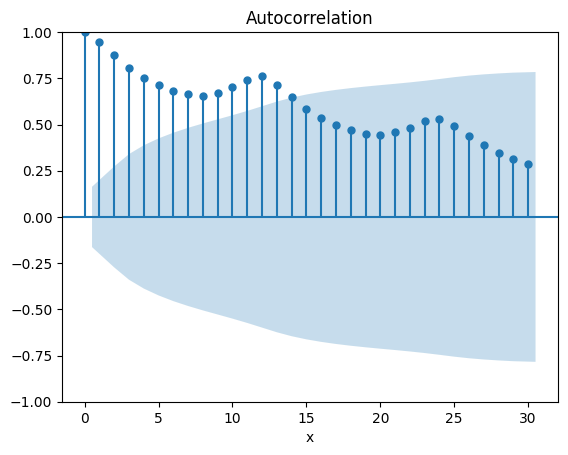

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Строим ACF-график
plot_acf(df['Passengers'], lags=30)
plt.xlabel('x')
plt.show()

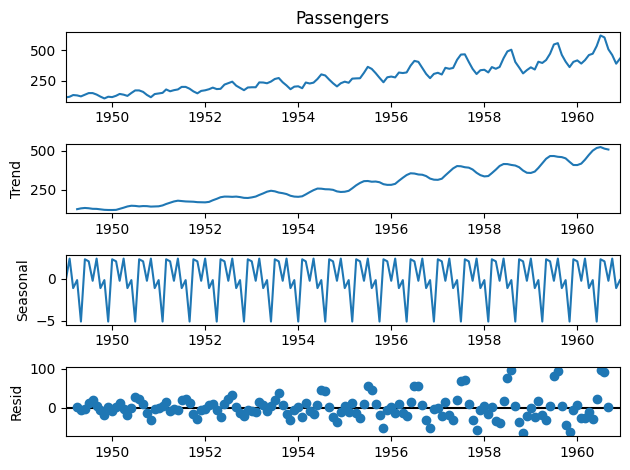

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Passengers'], model='additive', period=7)
decompose.plot()
plt.show()

In [125]:
DF = df.copy()
DF.tail(12)

,Date,Passengers
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461


In [127]:
test = DF[DF['Date'] >= '1960-01-01']

test.index = test['Date']

In [131]:
train = DF[DF['Date'] <= '1960-01-01']

train.index = train['Date']

In [132]:
del train['Date'], test['Date']

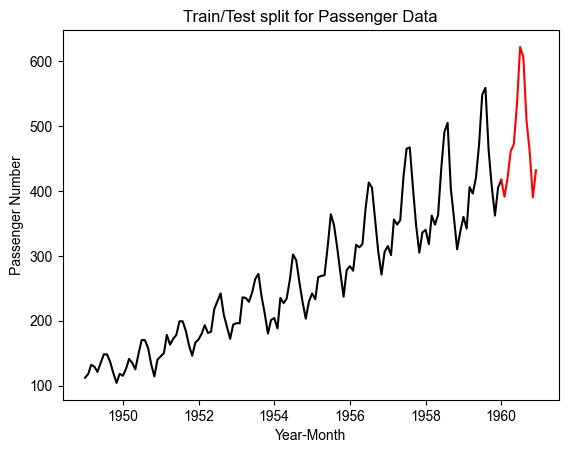

In [135]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [136]:
from pmdarima.arima import auto_arima


model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: Futur

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1226.856, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1286.405, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1276.949, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1273.468, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1285.130, Time=0.01 sec


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1230.288, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1267.370, Time=0.08 sec


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1233.853, Time=0.15 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 2.195 seconds


C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [143]:
train.tail()

,Passengers
Date,
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405
1960-01-01,417


In [144]:
test.head()

,Passengers
Date,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [147]:
forecast = model.predict(n_periods=len(test))

C:\python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


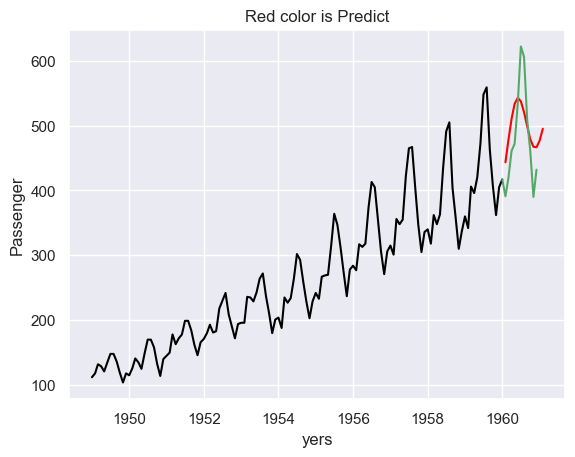

In [146]:
plt.plot(train, c='Black')
plt.plot(forecast, c='red')
plt.plot(test, c='g')
plt.xlabel("yers")
plt.ylabel('Passenger')
plt.title('Red color is Predict')
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test, forecast))

print('RMSE: ', rmse)

RMSE:  69.14093944879426


----------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sc
import statsmodels as st
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('shampoo_sales.csv')
df.shape

(36, 2)

In [3]:
dates = pd.date_range(start='2020-01-01', periods=36, freq='MS') 

In [4]:
df['date'] = dates

In [6]:
del df['Month']

In [8]:
df = df.loc[::, ['date', 'Sales']]

In [9]:
df.index = df['date']

In [10]:
del df['date']

In [11]:
df.head()

,Sales
date,
2020-01-01,266.0
2020-02-01,145.9
2020-03-01,183.1
2020-04-01,119.3
2020-05-01,180.3


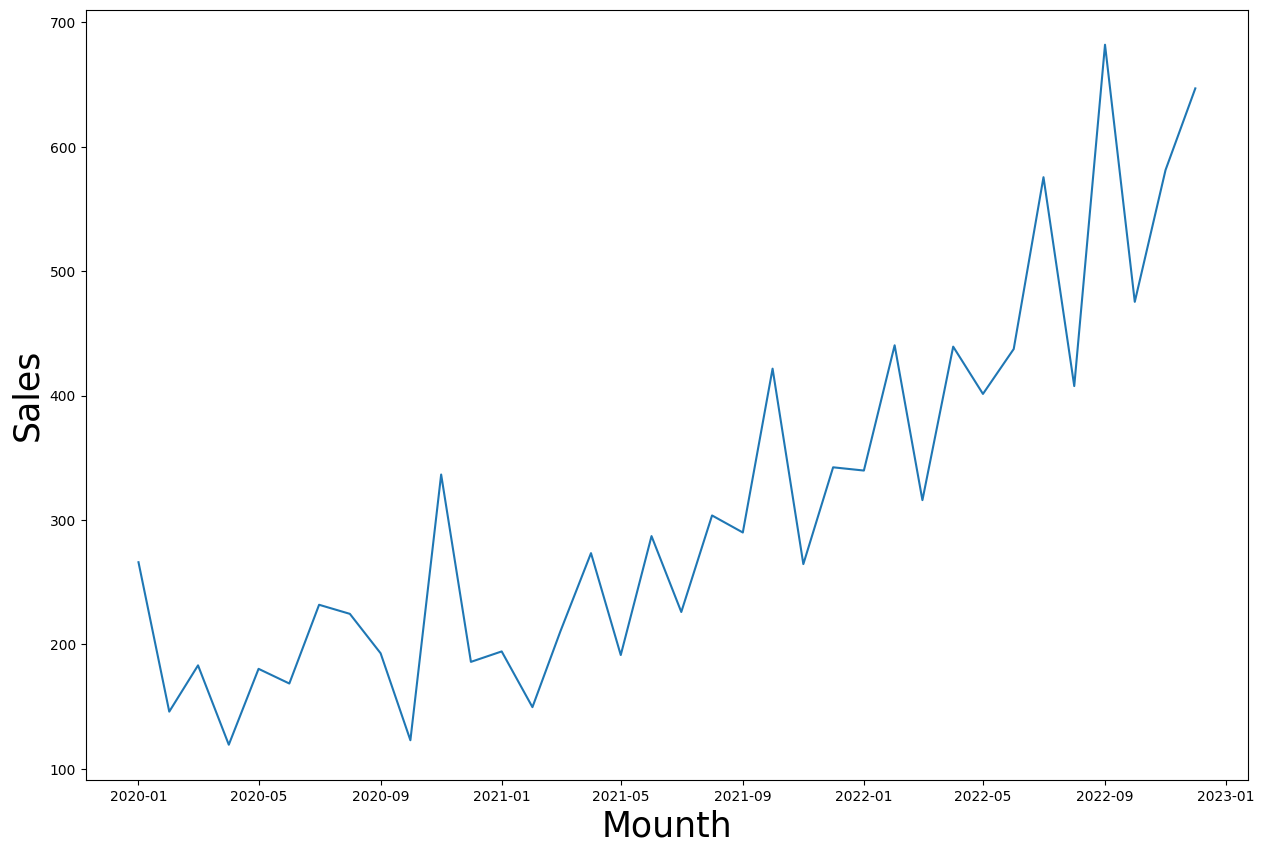

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(df)
plt.ylabel("Sales", size=25)
plt.xlabel("Mounth", size=25)
plt.show()

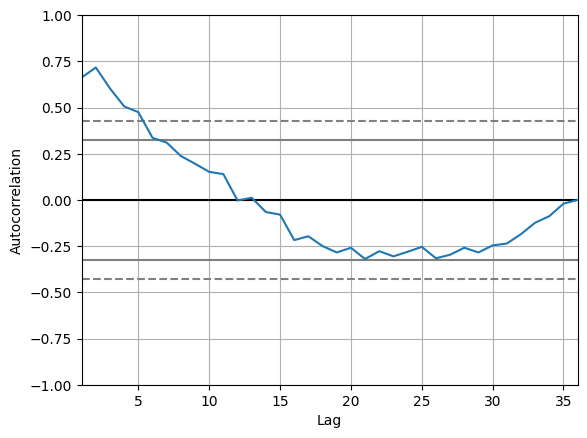

In [14]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(5, 1, 0))
res = model.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 10 Mar 2025   AIC                            408.969
Time:                        19:14:10   BIC                            418.301
Sample:                    01-01-2020   HQIC                           412.191
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


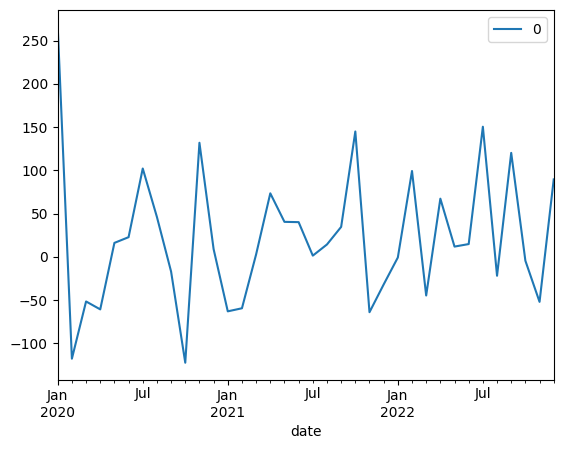

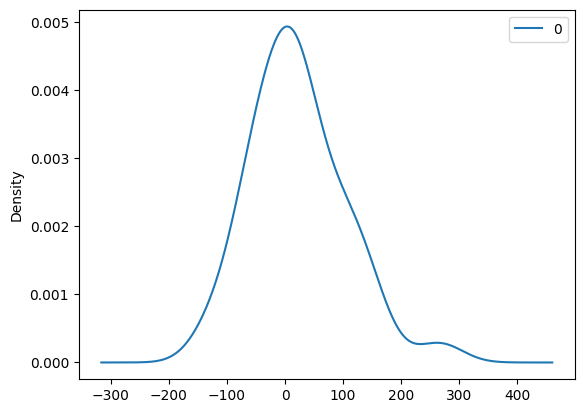

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [16]:
residual = pd.DataFrame(res.resid)
residual.plot()
plt.show()

residual.plot(kind='kde')
plt.show()
print(residual.describe())

In [17]:
df.tail()

,Sales
date,
2022-08-01,407.6
2022-09-01,682.0
2022-10-01,475.3
2022-11-01,581.3
2022-12-01,646.9


In [19]:
predict = res.predict('2022-12-01', '2023-06-01')

In [20]:
predict

2022-12-01    557.328858
2023-01-01    561.113738
2023-02-01    671.054471
2023-03-01    554.031815
2023-04-01    679.972138
2023-05-01    601.711133
2023-06-01    633.764693
Freq: MS, Name: predicted_mean, dtype: float64

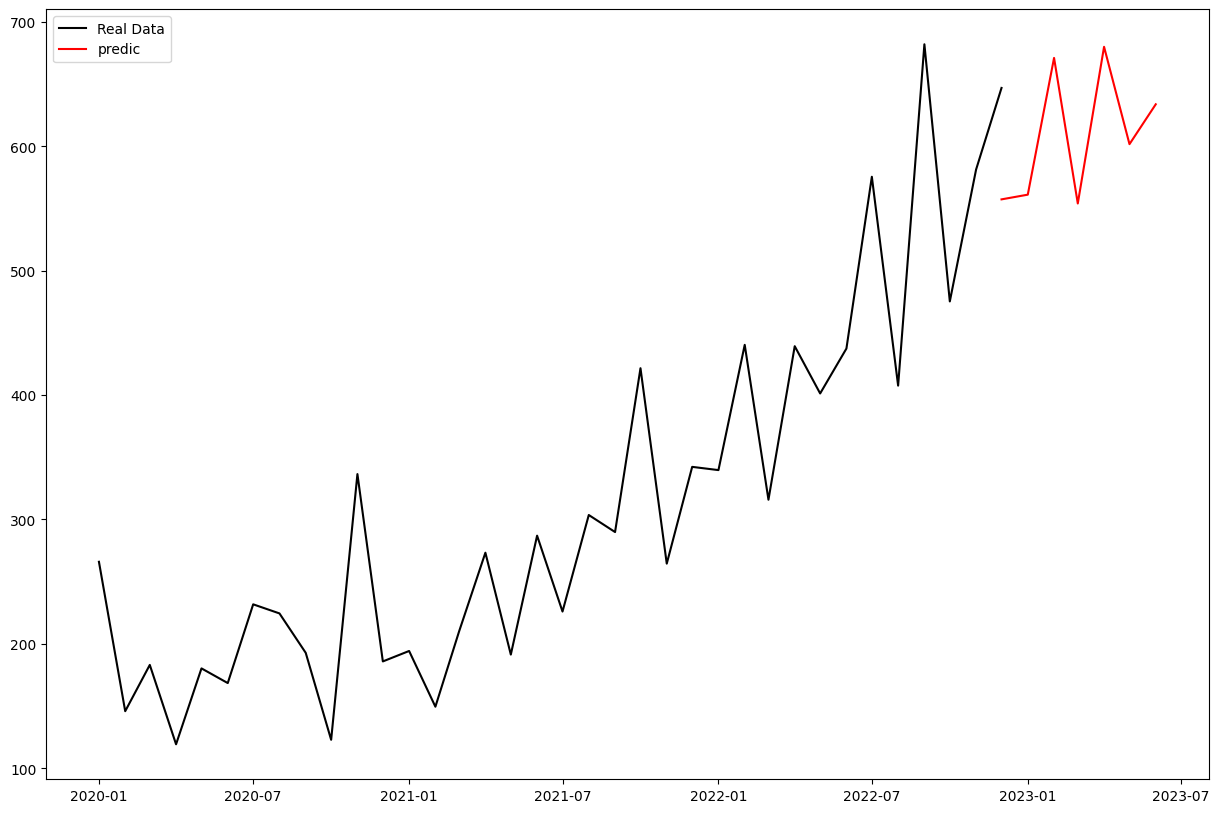

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(df, c='black', label='Real Data')
plt.plot(predict, c='red', label='predic')
plt.legend()
plt.show()

In [29]:
pd.Series(predict.values).cumsum()

0     557.328858
1    1118.442597
2    1789.497067
3    2343.528883
4    3023.501021
5    3625.212154
6    4258.976847
dtype: float64